In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "AnnualIncome": [15, 16, 17, 28, 30, 45, 55, 60, 65, 70],
    "SpendingScore": [39, 81, 6, 77, 40, 76, 6, 94, 3, 72],
    "Age": [19, 21, 20, 23, 24, 30, 32, 33, 35, 36],
}

In [3]:
df = pd.DataFrame(data)


In [4]:

df

,CustomerID,AnnualIncome,SpendingScore,Age
0,1,15,39,19
1,2,16,81,21
2,3,17,6,20
3,4,28,77,23
4,5,30,40,24
5,6,45,76,30
6,7,55,6,32
7,8,60,94,33
8,9,65,3,35
9,10,70,72,36


In [6]:
from sklearn.cluster import DBSCAN


In [7]:
from sklearn.preprocessing import StandardScaler  # <-- Import this FIRST

X = df[['AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

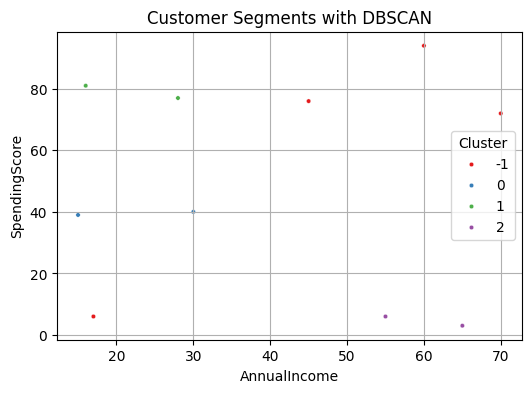

In [8]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)
df['Cluster'] = dbscan.fit_predict(X_scaled)
# Plotting
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set1', s=10)
plt.title('Customer Segments with DBSCAN')
plt.grid(True)
plt.show()

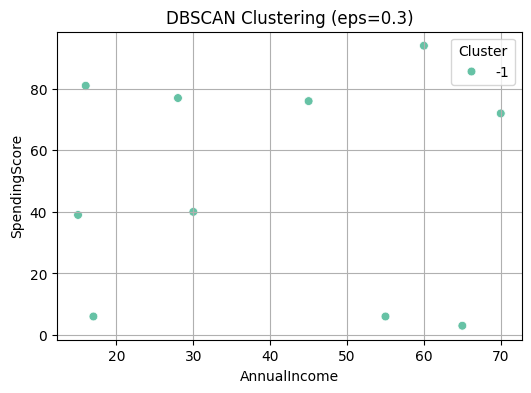

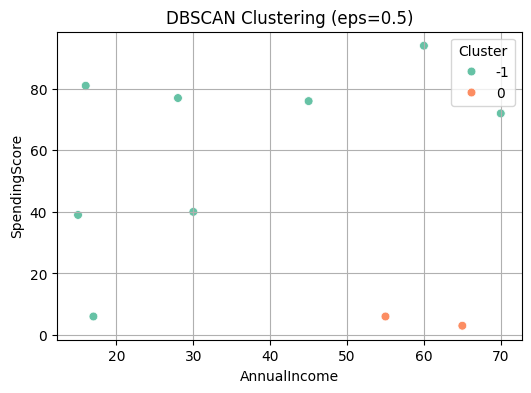

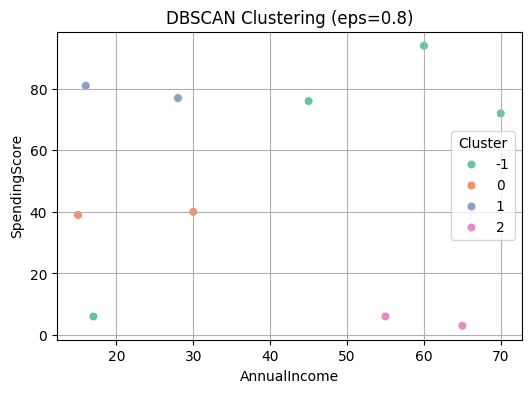

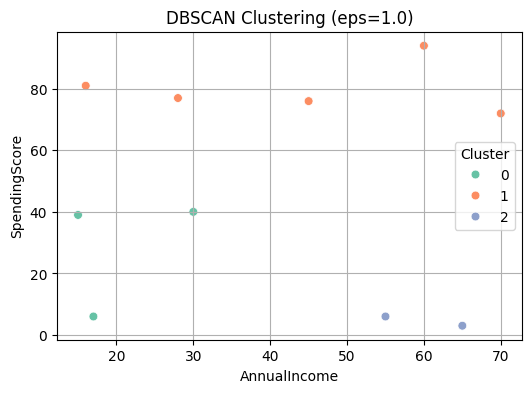

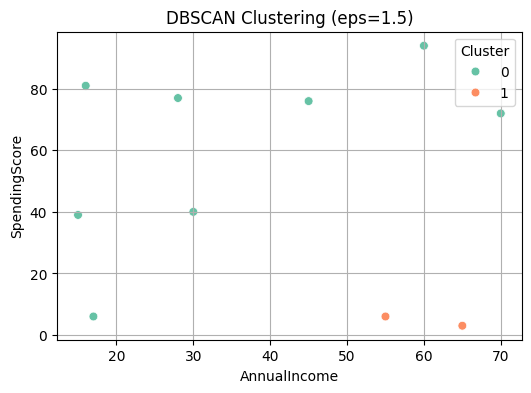

In [9]:
for eps_val in [0.3, 0.5, 0.8, 1.0, 1.5]:
    dbscan = DBSCAN(eps=eps_val, min_samples=2)
    df['Cluster'] = dbscan.fit_predict(X_scaled)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set2', s=40)
    plt.title(f'DBSCAN Clustering (eps={eps_val})')
    plt.grid(True)
    plt.show()